In [39]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse
from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.inelastic import SIInel
from detectors.dama import DAMA
from detectors.cosine import COSINE
from BSWDet import DAMA_BSW
from BSW import SIWIMPBSW
from veldists import VelDist
from constants import *

In [40]:
## Define the models and distributions we care about
Det = DAMA()
Model1 = SIWIMP()
Model2 = SIInel()
Dist = VelDist("modSHM",0.3) # standard halo model
Dist2 = VelDist("modShards",0.3) # standard halo model + shards

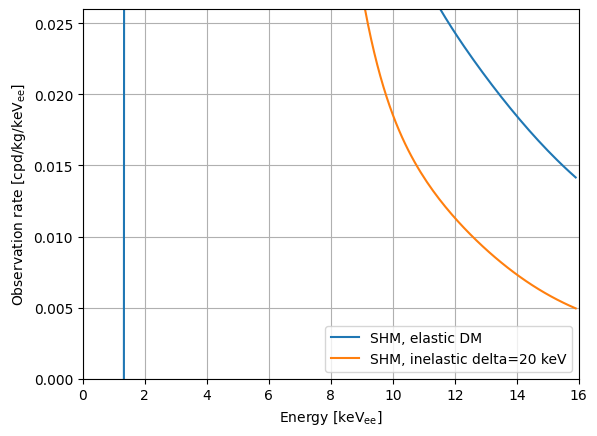

In [41]:
## Example 1: models with additional kwargs passed
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[Det.dRdE(e,Model2.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist,delta=20*keV) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM, elastic DM","SHM, inelastic delta=20 keV"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()

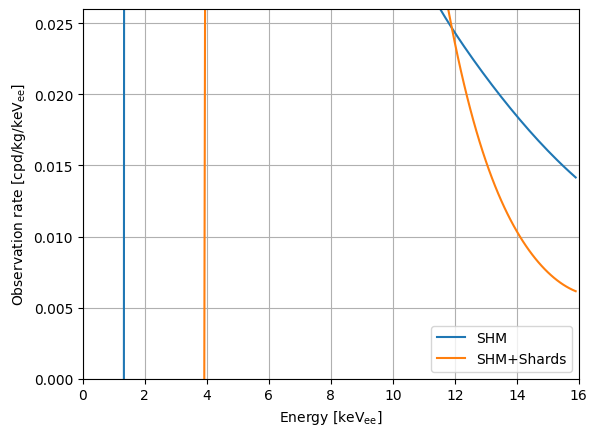

In [42]:
## Example 2: Comparing different velocity distributions
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist2) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM","SHM+Shards"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()

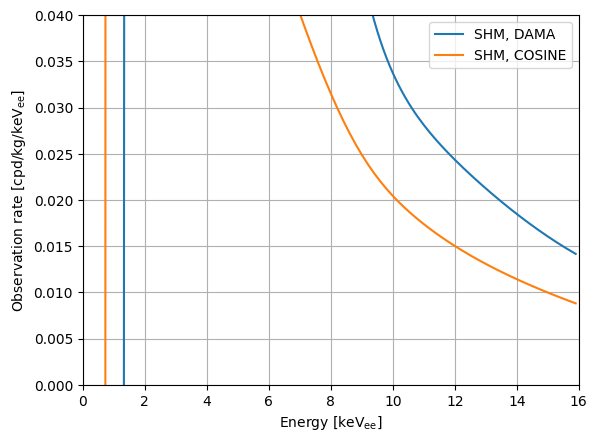

In [43]:
## Example 3: comparing different detectors
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[COSINE().dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM, DAMA","SHM, COSINE"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.04)
plt.grid()
plt.show()

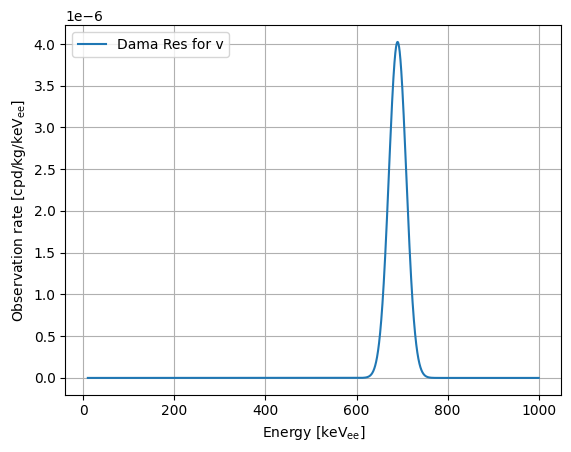

In [45]:
## Example 4: Demonstration of how to define DM rates/interactions without needing to build a new model object
##### Doubles as a demo of how to use the resolution as a multiplier rather than full smearing (in this case the two are equivalent) 

def bsw_a(Target,ER,mX,sig): 
    if ER!=mX:
        return 0
    else:
        C_a = 1.2 * 10**(19)
        g_ae = sig
        dsigdER = (C_a/(Target.A()))*(g_ae**2)*mX*(Target.sigma_PE(ER))
        return dsigdER
def bsw_v(Target,ER,mX,sig): 
    if ER!=mX:
        return 0
    else:
        C_v= 4 * 10**(23)
        kappa = sig
        dsigdER = (C_v/(Target.A()))*(kappa**2)*(137)*(1/mX)*(Target.sigma_PE(ER))
        return dsigdER
E = np.arange(10,1000,0.1) # observed energy, units of keV_ee
#plt.plot(E,[COSINE().dRdE(e,bsw_a,NR=False,DE=0.01,mX=6.00*keV,sig=1) for e in E])
#plt.plot(E,[COSINE().dRdE_True(6,bsw_a,NR=False,mX=6*keV,sig=1)*COSINE().Res(e,6) for e in E]) ## This model is a delta func so we can just scale gaussian resolution with the max val

#plt.plot(E,[DAMA().dRdE_True(690,bsw_a,NR=False,mX=690*keV,sig=1)*DAMA().Res(e,690) for e in E]) ## demonstrate how to use different detector
plt.plot(E,[DAMA().dRdE_True(690,bsw_v,NR=False,mX=690*keV,sig=1)*DAMA().Res(e,690) for e in E])
plt.legend(["Dama Res for v"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.grid()
plt.show()